In [1]:
from torchcore.data.datasets import MixDataset, COCOPersonPatchDataset, ModanetHumanPatchDataset
from torchcore.data.transforms import Resize, ResizeAndPadding
from dev import get_dataset
from dev import get_models
from dev import run_detect
from dev import load_classification_model
from IPython.display import Video


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
human_detector = 'yolo_v3'
human_resolution = 416
garment_detector = 'yolo_v3'
garment_resolution = 256
dataset_res = 416
device = 'cuda'

dataset, video_info = get_dataset(human_detector, dataset_res)
video_info['out_path'] = 'out_videos/test_human_{}_{}_garment_{}_{}.mp4'.format(human_detector, human_resolution, garment_detector, garment_resolution)

human_model, garment_model = get_models(human=human_detector, human_res=human_resolution, 
                             garment=garment_detector, garment_res=garment_resolution)


In [3]:
classification_model = load_classification_model(device)

<class 'torchcore.dnn.networks.heads.classification_head.ClassificationHead'> is not initialized
<class 'torch.nn.modules.container.Sequential'> is not initialized


In [4]:
run_detect(dataset, human_model, garment_model, garment_detector, video_info, classification_model=classification_model,garment_res=garment_resolution )

{'width': 1920.0, 'height': 1080.0, 'fps': 23.663101604278076, 'size': (1920, 1080), 'fourcc': 'avc1', 'out_path': 'out_videos/test_human_yolo_v3_416_garment_yolo_v3_256.mp4'}


In [ ]:
for i in range(45, 55):
    inputs, targets = dataset[i]
    img = inputs['data']
    plt.figure()
    plt.imshow(img)


In [ ]:
len(dataset)

In [4]:
from ipywidgets import Video, Image
from IPython.display import display
import numpy as np
import cv2
import base64

In [6]:
video = Video.from_file('./out_videos/human_ssd_416_garment_ssd_256.mp4')
video

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00h\xd3\xf8mdat\x00\x0…

In [3]:
#from IPython.display import Video

#Video("./out_videos/human_ssd_416_garment_ssd_256.mp4")

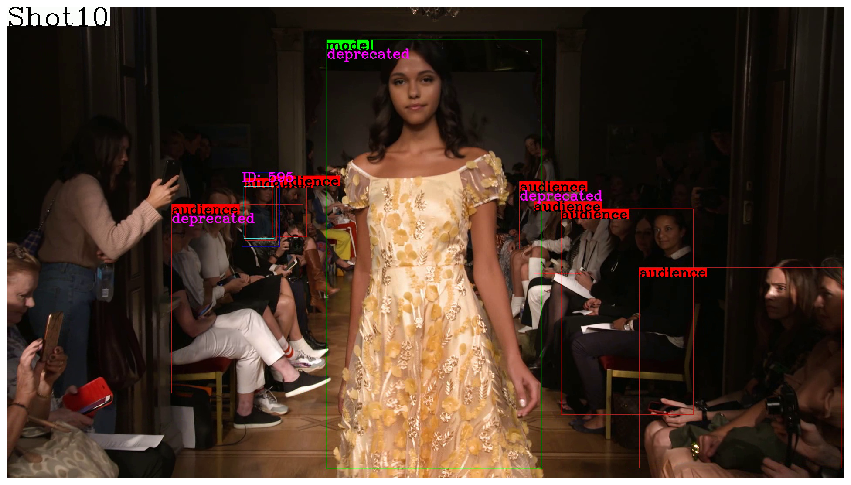

In [ ]:
import cv2
import matplotlib.pyplot as plt
from IPython import display
import time
cap = cv2.VideoCapture('out_videos/human_yolo_v3_416_garment_yolo_v3_256_new.mp4') 
cap.set(cv2.CAP_PROP_POS_FRAMES, 300)

fps = 30
title = 'normal speed video'
delay = int(1000 / fps)
#delay = 1/fps
plt.rcParams['figure.figsize'] = [15, 10]
while(cap.isOpened()):
    try:
        ret, frame = cap.read()
        if not ret:
            break
        #cv2.imshow(title, frame)
        #plt.imshow(frame)

        #cv2.waitKey(delay)
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.axis('off')
        plt.imshow(frame)
        plt.show()
        
        #time.sleep(delay)

        display.clear_output(wait=True)
        #display.display(plt.gcf())

    except KeyboardInterrupt:
        cap.release()
#cv2.destroyAllWindows() #close the image window

In [65]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./out_videos/human_ssd_416_garment_ssd_256.mp4" type="video/mp4">
</video></div>""")

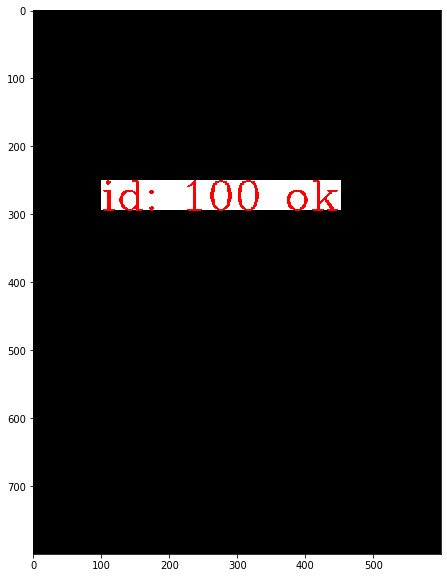

In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchcore.tools.visulize_tools import cv_put_text_with_box, cv_put_text

text = 'id: 100 ok'
im = np.zeros((800,600,3), dtype=np.uint8)

text_scale = 1
thickness = 2
box_color = (255, 0, 255)
position = (100,250)
cv_put_text_with_box(im, text, position, cv2.FONT_HERSHEY_COMPLEX, 2, font_color=(255, 0, 0), box_color=(255,255,255),thickness=2)
#text_size, baseline = cv2.getTextSize(text,cv2.FONT_HERSHEY_COMPLEX, text_scale, thickness)
#x, y = text_size
#cv2.rectangle(im, (0, 0), text_size, box_color, thickness=-1)
#cv2.putText(im, text, (0, y), cv2.FONT_HERSHEY_COMPLEX, text_scale, (255, 255, 0), thickness)
#print(text_size)
#print(baseline)

plt.imshow(im)